## Data analysis of Amazon dataset, prediction of user rating

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = None
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


In [164]:
df = pd.read_csv('bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (National Geographic Kids)",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Delete null values

In [165]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [185]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [166]:
data = pd.get_dummies(df, columns=['Genre'])
data = data.rename({'Genre_Fiction':'Fiction','Genre_Non Fiction':'Non Fiction'},axis=1)

In [167]:
data = data.groupby(['Name','Author']).agg({'User Rating':'mean',
    'Reviews':'max',
    'Price':'mean',
    'Non Fiction':'first',
    'Fiction':'first'
}).reset_index()

In [168]:
data.head()

,Name,Author,User Rating,Reviews,Price,Non Fiction,Fiction
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8.0,1,0
1,11/22/63: A Novel,Stephen King,4.6,2052,22.0,0,1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15.0,1,0
3,1984 (Signet Classics),George Orwell,4.7,21424,6.0,0,1
4,"5,000 Awesome Facts (About Everything!) (National Geographic Kids)",National Geographic Kids,4.8,7665,12.0,1,0


Find distribution of rating

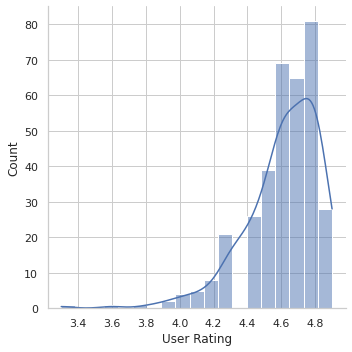

In [169]:
sns.displot(data['User Rating'], kde = True)
plt.show()

Numbers of books by genres

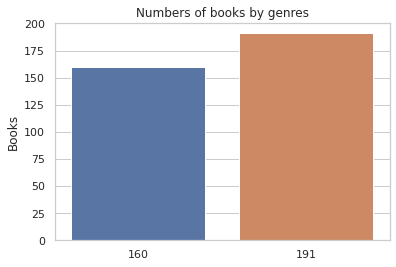

In [170]:
books_by_genre = data[['Fiction','Non Fiction']].sum()
sns.barplot(x=books_by_genre.index, y=books_by_genre.values, data=books_by_genre)
plt.title('Numbers of books by genres')
plt.ylabel('Books')
plt.show()

Average book price by year

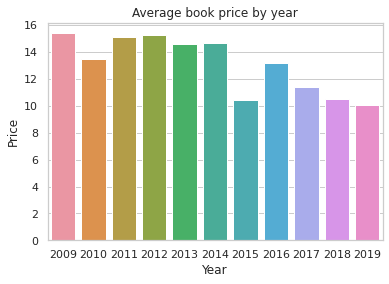

In [171]:
price_by_year = df[['Price','Year']].groupby('Year').mean().reset_index()
sns.barplot(x='Year', y = 'Price', data=price_by_year)
plt.title('Average book price by year')
plt.show()

Price distribution

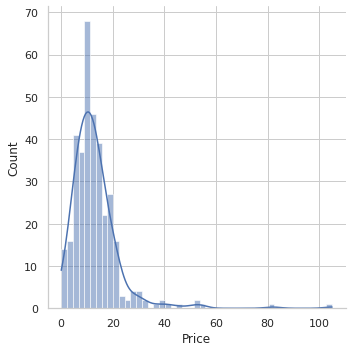

In [172]:
sns.displot(data['Price'], kde = True)
plt.title('Price distribution')
plt.show()

10 most popular authors

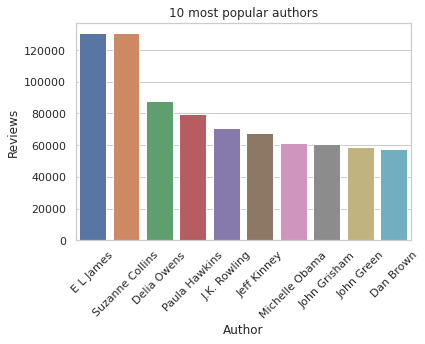

In [173]:
authors_by_reviews = data[['Author','Reviews']].groupby('Author').sum().reset_index().sort_values(by='Reviews', ascending=False)[:10]
sns.barplot(x='Author', y = 'Reviews', data=authors_by_reviews)
plt.xticks(rotation=45)
plt.title('10 most popular authors')
plt.show()

Top 15 most popular books

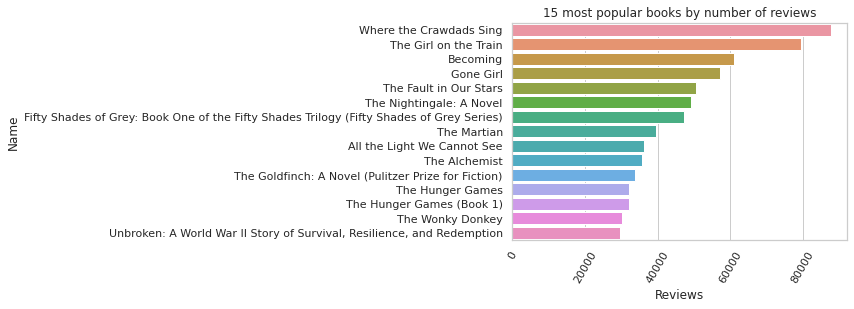

In [174]:
books_by_reviews = data[['Name','Reviews']].sort_values(by='Reviews', ascending=False)[:15]
sns.barplot(x='Reviews', y ='Name' , data=books_by_reviews, orient='h')

plt.xticks(rotation=60)
plt.title('15 most popular books by number of reviews')
plt.show()

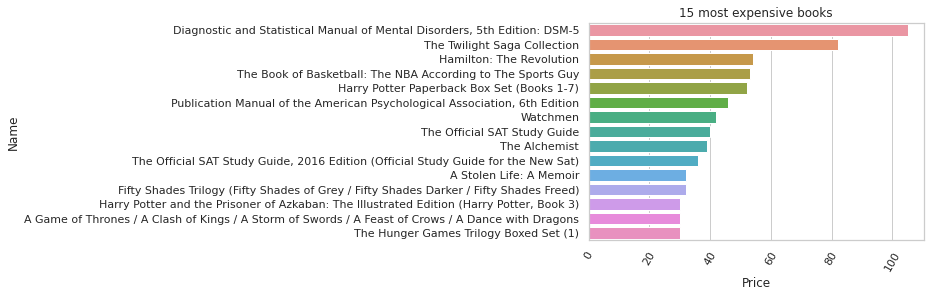

In [175]:
books_by_price = data[['Name','Price']].sort_values(by='Price', ascending=False)[:15]
sns.barplot(x='Price', y ='Name' , data=books_by_price, orient='h')

plt.xticks(rotation=60)
plt.title('15 most expensive books')
plt.show()

Correlation matrix

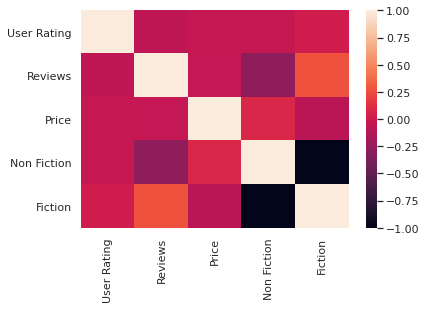

In [176]:
sns.heatmap(data.corr())
plt.show()

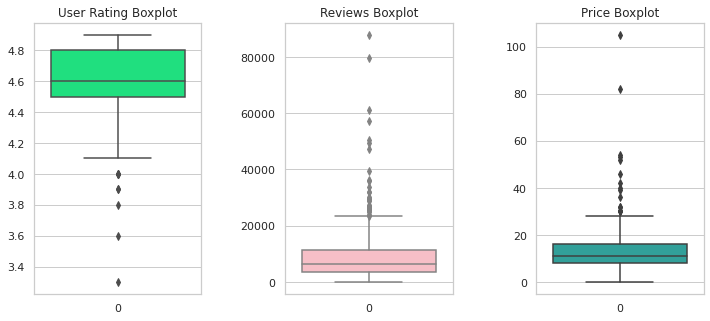

In [177]:
cols = ['User Rating','Reviews', 'Price']
colors = ['springgreen','lightpink','lightseagreen']
outlier_data = data[cols]

plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.5)

i=1
for col in cols:
    plt.subplot(1,3,i)
    sns.boxplot(data=outlier_data[col],color=colors[i-1])
    plt.title(f'{col} Boxplot')
    i+=1

plt.show()

## Encoding

Encode authors

In [178]:
le = LabelEncoder()
data['Author'] = le.fit_transform(data['Author'])
data.head()

,Name,Author,User Rating,Reviews,Price,Non Fiction,Fiction
0,10-Day Green Smoothie Cleanse,114,4.7,17350,8.0,1,0
1,11/22/63: A Novel,219,4.6,2052,22.0,0,1
2,12 Rules for Life: An Antidote to Chaos,134,4.7,18979,15.0,1,0
3,1984 (Signet Classics),95,4.7,21424,6.0,0,1
4,"5,000 Awesome Facts (About Everything!) (National Geographic Kids)",174,4.8,7665,12.0,1,0


## Predicting user rating, comparing different regression algorithms with different scalers

In [179]:
def get_error(model, X_test, y_test, scaler_name):

    y_pred = model.predict(X_test)
    results = {'Model':model.__class__.__name__,
    'Scaler': scaler_name,
    'MSE': mean_squared_error(y_test,y_pred),
    'RMSE': mean_squared_error(y_test,y_pred,squared=False),
    'MAE': mean_absolute_error(y_test,y_pred)}
    df = pd.DataFrame.from_dict(results.values()).T
    df.columns = results.keys()

    return df

In [180]:
def get_results(scaler, data=data):

    X = data.drop(['Name','User Rating'], axis=1)
    y = data['User Rating']

    if scaler:
        scaler_name=scaler.__class__.__name__
        X = scaler.fit_transform(X)
    else:
        scaler_name = 'None'

    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
    
    lr = LinearRegression().fit(X_train,y_train)
    df = get_error(lr, X_test,y_test,scaler_name)

    rr = Ridge().fit(X_train,y_train)
    df = df.append(get_error(rr, X_test,y_test,scaler_name))

    lsr = Lasso().fit(X_train,y_train)
    df = df.append(get_error(lsr, X_test,y_test,scaler_name))

    elr = ElasticNet().fit(X_train,y_train)
    df = df.append(get_error(elr, X_test,y_test,scaler_name))

    return df

In [181]:
result_df = get_results(None)
result_df

,Model,Scaler,MSE,RMSE,MAE
0,LinearRegression,None,0.0540709,0.232531,0.182114
0,Ridge,None,0.0540723,0.232535,0.182121
0,Lasso,None,0.0540832,0.232558,0.181842
0,ElasticNet,None,0.0540875,0.232567,0.181855


In [182]:
scalers = [StandardScaler(),MaxAbsScaler(),MinMaxScaler(),RobustScaler()]
for scaler in scalers:
    result_df = result_df.append(get_results(scaler))

In [183]:
result_df.sort_values(['MSE','RMSE','MAE'])

,Model,Scaler,MSE,RMSE,MAE
0,Lasso,StandardScaler,0.0534857,0.23127,0.178497
0,ElasticNet,StandardScaler,0.0534857,0.23127,0.178497
0,Lasso,MaxAbsScaler,0.0534857,0.23127,0.178497
0,ElasticNet,MaxAbsScaler,0.0534857,0.23127,0.178497
0,Lasso,MinMaxScaler,0.0534857,0.23127,0.178497
0,ElasticNet,MinMaxScaler,0.0534857,0.23127,0.178497
0,Lasso,RobustScaler,0.0534857,0.23127,0.178497
0,ElasticNet,RobustScaler,0.0534857,0.23127,0.178497
0,Ridge,MaxAbsScaler,0.0535745,0.231462,0.180385
0,Ridge,MinMaxScaler,0.0535746,0.231462,0.180386


### Thanks for attention!